<a href="https://colab.research.google.com/github/AraiKensuke/AIiRPS/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------
[0 1 3 4 5 7]
[2 6]
------
[0 2 3 4 6 7]
[1 5]
------
[1 2 4 5 6 7]
[0 3]
------
[0 1 2 3 5 6]
[4 7]
coefficients when penalty for coefficients is small
[  -1.30657522 -228.82233096  525.56065802  316.17531973 -307.0136771
   89.32168772 -105.0813979   119.59798934  571.33087056   65.00731595]
coefficients when penalty for coefficients is large
[  0.          -0.         367.70185207   6.30190419   0.
   0.          -0.           0.         307.6057       0.        ]


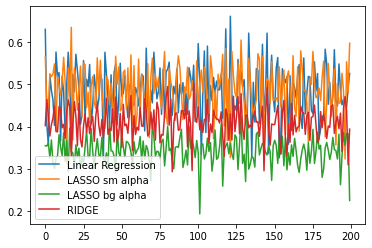

In [10]:
import numpy as np
import matplotlib.pyplot as _plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor

####  some plug-and-play regression algorithms
clf  = LinearRegression()
las1 = Lasso(alpha=0.01)
las2 = Lasso(alpha=1)
ridg = Ridge()

X, y = datasets.load_diabetes(return_X_y=True)

rkf = RepeatedKFold(n_splits=4, n_repeats=1)   #  2 different realizations of 4-fold
datinds = np.arange(8)

###   Let's take a look at what 4-fold split looks like.  Using data 
for train, test in rkf.split(datinds):
    print("------")
    print(train)
    print(test)

###  Examples using regression.  cross_val_score fits data on training data (generated by rkf), 
###  and returns score on prediction of test data (generated by rkf)
rkf = RepeatedKFold(n_splits=4, n_repeats=50)#, random_state=0)
scoresLR = cross_val_score(clf,  X, y, cv=rkf)
scoresLA1 = cross_val_score(las1,  X, y, cv=rkf)
scoresLA2 = cross_val_score(las2,  X, y, cv=rkf)
scoresRD = cross_val_score(ridg, X, y, cv=rkf)


_plt.plot(scoresLR, label="Linear Regression")
_plt.plot(scoresLA1, label="LASSO sm alpha")
_plt.plot(scoresLA2, label="LASSO bg alpha")
_plt.plot(scoresRD, label="RIDGE")
_plt.legend()


las1.fit(X, y)
las2.fit(X, y)
print("coefficients when penalty for coefficients is small")
print(las1.coef_)
print("coefficients when penalty for coefficients is large")
print(las2.coef_)


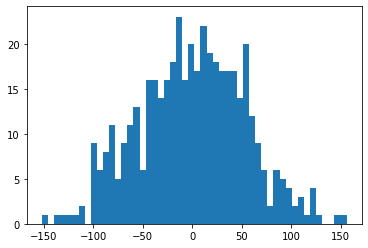

In [11]:
###  Take a look - are the residuals gaussian-like?  Just use all data here, to see if we need to do a transformation or not.
clf.fit(X, y)
yP = clf.predict(X)
#  residuals
out = _plt.hist(yP - y, bins=50)